In [1]:
import numpy as np
import nltk
import warnings
warnings.filterwarnings('ignore')

# Dataset

In [2]:
import pandas as pd
train = pd.read_csv('hotel_train.csv')

In [3]:
train.head(3)

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy


In [4]:
train.shape

(38932, 5)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [6]:
train.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id40872,1
Description,38932,38912,#NAME?,21
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


# Data cleaning

In [7]:
count = train.isnull().sum().sort_values(ascending=False)
percentage = ((train.isnull().sum()/len(train)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


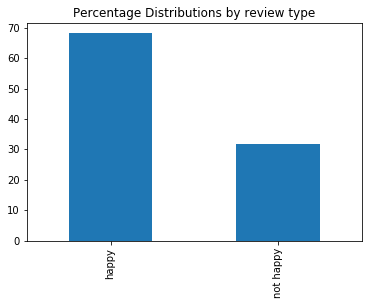

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(train.Is_Response.value_counts(normalize=True)*100,2))
round(train.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()


In [9]:
#Removing columns
train.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [10]:
#Apply first level cleaning
import re
import string

#This function converts to lower-case, remove square-brackets, removes numbers and punctuations
def text_clean_l(text):
    text = text.lower()
    text =re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
cleaned1 = lambda x: text_clean_l(x)

In [11]:
#Let's take a look at the updated text
train['cleaned_description'] = pd.DataFrame(train.Description.apply(cleaned1))
train.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [12]:
#Applying the secound round of cleaning
def text_clean_2(text):
    text = re.sub('[''""_]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [13]:
#Let's take a look at the updated text data
train['cleaned_description_new'] = pd.DataFrame(train['cleaned_description'].apply(cleaned2))
train.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


# Cleaning Test Data

In [14]:
#calling and cleaning test dataset
test=pd.read_csv('hotel_test.csv')

In [15]:
test.head(5)

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [16]:
test.shape

(29404, 4)

In [17]:
test.info

<bound method DataFrame.info of         User_ID                                        Description  \
0       id80132  Looking for a motel in close proximity to TV t...   
1       id80133  Walking distance to Madison Square Garden and ...   
2       id80134  Visited Seattle on business. Spent - nights in...   
3       id80135  This hotel location is excellent and the rooms...   
4       id80136  This hotel is awesome I love the service Antho...   
...         ...                                                ...   
29399  id109531  I stayed at the hotel and towers for a confere...   
29400  id109532  Trying to stay within the Marriott family and ...   
29401  id109533  We stayed for - nights with our little dog,ver...   
29402  id109534  Stayed at the Yotel over the weekend and was v...   
29403  id109535  The Blakely is is comfortable is every way: th...   

            Browser_Used Device_Used  
0                Firefox      Mobile  
1       InternetExplorer     Desktop  
2         

In [18]:
test.describe().transpose()

,count,unique,top,freq
User_ID,29404,29404,id101037,1
Description,29404,29391,#NAME?,14
Browser_Used,29404,11,Firefox,5676
Device_Used,29404,3,Desktop,11349


In [19]:
count = test.isnull().sum().sort_values(ascending=False)
percentage = ((test.isnull().sum()/len(test)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


Percentage for default

Desktop    38.60
Mobile     38.22
Tablet     23.18
Name: Device_Used, dtype: float64


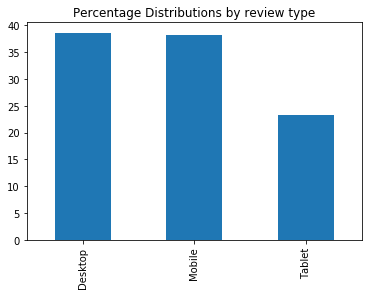

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(test.Device_Used.value_counts(normalize=True)*100,2))
round(test.Device_Used.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [21]:
test.drop(columns = ['User_ID', 'Browser_Used'], inplace = True)

In [22]:
#Apply first level cleaning
import re
import string

#This function converts to lower-case, remove square-brackets, removes numbers and punctuations
def text_clean_l(text):
    text = text.lower()
    text =re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
cleaned1 = lambda x: text_clean_l(x)

In [23]:
test['cleaned_description'] = pd.DataFrame(test.Description.apply(cleaned1))
test.head(10)

,Description,Device_Used,cleaned_description
0,Looking for a motel in close proximity to TV t...,Mobile,looking for a motel in close proximity to tv t...
1,Walking distance to Madison Square Garden and ...,Desktop,walking distance to madison square garden and ...
2,Visited Seattle on business. Spent - nights in...,Tablet,visited seattle on business spent nights in t...
3,This hotel location is excellent and the rooms...,Mobile,this hotel location is excellent and the rooms...
4,This hotel is awesome I love the service Antho...,Mobile,this hotel is awesome i love the service antho...
5,"Rooms, concierge services and party scene were...",Tablet,rooms concierge services and party scene were ...
6,What a pleasant place to stay!\nThe hotel is b...,Tablet,what a pleasant place to stay\nthe hotel is be...
7,I booked out the same day I arrived. It cost m...,Desktop,i booked out the same day i arrived it cost me...
8,Unlike some hotels that grimace when you show ...,Tablet,unlike some hotels that grimace when you show ...
9,Hotel Sorella for my birthday. I absolutely lo...,Mobile,hotel sorella for my birthday i absolutely lov...


In [24]:
#Applying the secound round of cleaning
def text_clean_2(text):
    text = re.sub('[''""_]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [25]:
#Let's take a look at the updated text data
test['cleaned_description_new'] = pd.DataFrame(train['cleaned_description'].apply(cleaned2))
test.head(10)

,Description,Device_Used,cleaned_description,cleaned_description_new
0,Looking for a motel in close proximity to TV t...,Mobile,looking for a motel in close proximity to tv t...,the room was kind of clean but had a very stro...
1,Walking distance to Madison Square Garden and ...,Desktop,walking distance to madison square garden and ...,i stayed at the crown plaza april april th...
2,Visited Seattle on business. Spent - nights in...,Tablet,visited seattle on business spent nights in t...,i booked this hotel through hotwire at the low...
3,This hotel location is excellent and the rooms...,Mobile,this hotel location is excellent and the rooms...,stayed here with husband and sons on the way t...
4,This hotel is awesome I love the service Antho...,Mobile,this hotel is awesome i love the service antho...,my girlfriends and i stayed here to celebrate ...
5,"Rooms, concierge services and party scene were...",Tablet,rooms concierge services and party scene were ...,we had rooms one was very nice and clearly ha...
6,What a pleasant place to stay!\nThe hotel is b...,Tablet,what a pleasant place to stay\nthe hotel is be...,my husband and i have stayed in this hotel a f...
7,I booked out the same day I arrived. It cost m...,Desktop,i booked out the same day i arrived it cost me...,my wife i stayed in this glorious city a whil...
8,Unlike some hotels that grimace when you show ...,Tablet,unlike some hotels that grimace when you show ...,my boyfriend and i stayed at the fairmont on a...
9,Hotel Sorella for my birthday. I absolutely lo...,Mobile,hotel sorella for my birthday i absolutely lov...,wonderful staff great location but it was defi...


# Model Training

In [26]:
from sklearn.model_selection import train_test_split

x=train.cleaned_description_new
y=train.Is_Response

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.1, random_state = 255)

In [28]:
print('x_train :', len(x_train))
print('x_test :', len(x_test))
print('y_train :', len(y_train))
print('y_test :', len(y_test))

x_train : 35038
x_test : 3894
y_train : 35038
y_test : 3894


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")

from sklearn.pipeline import Pipeline

In [30]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(x_train,y_train)

from sklearn.metrics import confusion_matrix

predictions = model.predict(x_test)

confusion_matrix(predictions, y_test)

array([[2459,  322],
       [ 140,  973]], dtype=int64)

# Model Prediction

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, y_test))
print("Precision :", precision_score(predictions, y_test, average = "weighted"))

Accuracy :  0.8813559322033898
Precision : 0.8904597543330824


# Try on new reviews

In [39]:
example = ["I am unhappy"]
result = model.predict(example)

print(result)

['not happy']
